*Forecasting Credit Ratings*

This project is dedicated to forecasting credit ratings within the banking sector. Through this notebook, we undertake a journey to leverage data and machine learning, targeting a key element of fiscal decision-making.

Project Aim:

The core objective of this project is to create a reliable and precise model for forecasting credit ratings. Credit ratings are critical in the financial realm, impacting decisions related to loans, interest rates, and the accessibility of diverse financial services. Our goals in effectively forecasting credit ratings are:

1. Facilitating Knowledge-Driven Decisions: Equip financial entities with a resourceful tool for enlightened decision-making regarding loan sanctioning, interest rate determination, and credit limit settings, thereby bolstering risk management.

2. Promoting Financial Inclusivity: Advocate for equitable credit access by pinpointing individuals potentially eligible for credit yet frequently overlooked by conventional credit rating systems.

3. Diminishing Default Rates: Aim to curtail default risks by early identification of applicants with higher default probabilities.

Loading the Libraries and the Data

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
pd1 = pd.read_csv('/content/test.csv')
pd2 = pd.read_csv('/content/test.csv')

print(pd1.columns)
print(pd2.columns)

df = pd.concat([pd1, pd2], ignore_index = True)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Pa

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Printing the Columns

In [45]:
print(df.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')


Displaying 10 Sample rows

In [46]:
print(df.sample(10))

            ID Customer_ID      Month            Name  Age          SSN  \
9747    0x883d  CUS_0x3a94   December           Mikew   32  642-07-8250   
27525  0x15897  CUS_0x84fe    October            Leee   38  579-44-7984   
66493   0xd74f  CUS_0xa2d2    October     Dan Levinel   22    #F%$D@*&8   
33120  0x19a2a  CUS_0x6df1  September         Holtonu   46  831-17-3673   
36968  0x1c742  CUS_0xae54  September   Steve Slaterw   29  078-25-0166   
46401  0x235cb  CUS_0x5502    October          Carewa   22  256-41-5668   
3973    0x4497  CUS_0x6895    October  Stephen Brownn  42_  989-88-6895   
74753  0x1381b  CUS_0x61ba    October         Ilainap   38  778-88-8851   
99096  0x25562  CUS_0x5ff6  September     Tom Berginf   31  969-04-8576   
66417   0xd66b  CUS_0x5036    October     Lomi Krielh   44  997-77-5397   

          Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
9747        Mechanic      22320.13            2151.010833                  5   
27525  Media_M

Summary of Numeric Columns

In [47]:
print(df.describe())

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           85004.000000      100000.000000    100000.000000   
mean             4182.004291          16.838260        22.921480   
std              3174.090633         116.396266       129.314158   
min               303.645417          -1.000000         0.000000   
25%              1625.188333           3.000000         4.000000   
50%              3086.305000           6.000000         5.000000   
75%              5934.251014           7.000000         7.000000   
max             15204.633333        1798.000000      1499.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          97930.000000   
mean       68.772640            21.052640             30.080200   
std       451.600105            14.860323            196.983115   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

Checking for Null Values

In [48]:
print(df.isnull().sum())

ID                              0
Customer_ID                     0
Month                           0
Name                        10030
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14996
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       6996
Changed_Credit_Limit            0
Num_Credit_Inquiries         2070
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8940
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4542
Payment_Behaviour               0
Monthly_Balance              1124
dtype: int64


Data Types of Columns

In [49]:
print(df.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object


Unique Values for Categorical Columns

In [50]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")
    print(f"{col}: {df[col].unique()} unique values")

ID: ['0x160a' '0x160b' '0x160c' ... '0x25fef' '0x25ff0' '0x25ff1']
ID: ['0x160a' '0x160b' '0x160c' ... '0x25fef' '0x25ff0' '0x25ff1'] unique values
Customer_ID: ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Customer_ID: ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c'] unique values
Month: ['September' 'October' 'November' 'December']
Month: ['September' 'October' 'November' 'December'] unique values
Name: ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Name: ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks'] unique values
Age: ['23' '24' '24_' '28' '35' '55' '22' '31' '32' '1694' '34' '30' '914' '45'
 '41_' '41' '33' '36' '39' '40' '40_' '37' '21' '46' '26' '27' '32_' '42'
 '42_' '20' '48' '49' '33_' '38' '38_' '44' '-500' '16' '17' '37_' '19_'
 '19' '3193' '43' '339' '14' '15' '25' '21_' '1203' '46_' '2823' '22_'
 '18' '47' '1643

Handle numeric conversions, encode categorical variables, and drop columns that are unlikely to be useful for predictive modeling.

In [51]:
print(df.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object


In [54]:
# Drop unrelated/columns that are not required
df.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Occupation', 'Month'], axis=1, inplace=True)

# Convert month to numeric data with one-hot encoding
#month_dummies = pd.get_dummies(df['Month'], prefix='Month')
#df = pd.concat([df, month_dummies], axis=1).drop('Month', axis=1)

# Convert age to numeric value
df['Age'] = pd.to_numeric(df['Age'].str.replace('_', ''), errors='coerce')

# One-hot encoding for age
#occupation_dummies = pd.get_dummies(df['Occupation'], prefix='Occupation')
#df = pd.concat([df, occupation_dummies], axis=1).drop('Occupation', axis=1)

# Cleaning and converting Annual Income
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'].str.replace('_', ''), errors='coerce')

# Cleaning and converting Num_of_Loan
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'].str.replace('_', ''), errors='coerce')

# Cleaning and converting Loan_Count and Type_of_Loan
df['Loan_Count'] = df['Type_of_Loan'].str.split(',').str.len()
df.drop('Type_of_Loan', axis=1, inplace=True)

# Cleaning and converting Num_of_delayed_payment
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# Cleaning and converting Changed_Credit_Limit
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'].str.replace('_', ''), errors='coerce')

# Cleaning and converting Credit_Mix
credit_mix_dummies = pd.get_dummies(df['Credit_Mix'], prefix='Credit_Mix')
df = pd.concat([df, credit_mix_dummies], axis=1).drop('Credit_Mix', axis=1)

# Cleaning and converting Outstanding_Debt
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].str.replace('_', ''), errors='coerce')

# Cleaning and converting Credit_History_Years, Credit_History_Months, Total_Credit_History_Months, Credit_History_Age
df['Credit_History_Years'] = df['Credit_History_Age'].str.extract('(\d+) Years').astype(float)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract('(\d+) Months').astype(float)
df['Total_Credit_History_Months'] = df['Credit_History_Years'] * 12 + df['Credit_History_Months']
df.drop(['Credit_History_Age', 'Credit_History_Years', 'Credit_History_Months'], axis=1, inplace=True)

# Cleaning and converting Payment_of_Min_Amount
payment_min_amount_dummies = pd.get_dummies(df['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount')
df = pd.concat([df, payment_min_amount_dummies], axis=1).drop('Payment_of_Min_Amount', axis=1)

# Cleaning and converting Amount_invested_monthly
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

# Cleaning and converting Payment_Behaviour
payment_behaviour_dummies = pd.get_dummies(df['Payment_Behaviour'], prefix='Payment_Behaviour')
df = pd.concat([df, payment_behaviour_dummies], axis=1).drop('Payment_Behaviour', axis=1)

# Cleaning and converting Monthly_Balance
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

# Cleaning and converting Credit_Score
label_encoder = LabelEncoder()
df['Credit_Score'] = label_encoder.fit_transform(df['Credit_Score'].astype(str))

KeyError: ignored

Dropping NaN Rows

In [55]:
df.isnull().sum()

Age                                                       0
Annual_Income                                             0
Monthly_Inhand_Salary                                 14996
Num_Bank_Accounts                                         0
Num_Credit_Card                                           0
Interest_Rate                                             0
Num_of_Loan                                               0
Delay_from_due_date                                       0
Num_of_Delayed_Payment                                 9850
Changed_Credit_Limit                                   2118
Num_Credit_Inquiries                                   2070
Outstanding_Debt                                          0
Credit_Utilization_Ratio                                  0
Total_EMI_per_month                                       0
Amount_invested_monthly                                8892
Monthly_Balance                                        1136
Loan_Count                              

In [56]:
df = df.dropna()

In [57]:
print(df.columns)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Loan_Count', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Credit_Mix__', 'Total_Credit_History_Months',
       'Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes', 'Payment_Behaviour_!@9#%8',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dt

In [ ]:
print("Size of the dataset:", df.shape)

Size of the dataset: (53322, 32)


Further Exploration

Data Visualization:
Visualizing data that are not obvious from numbers

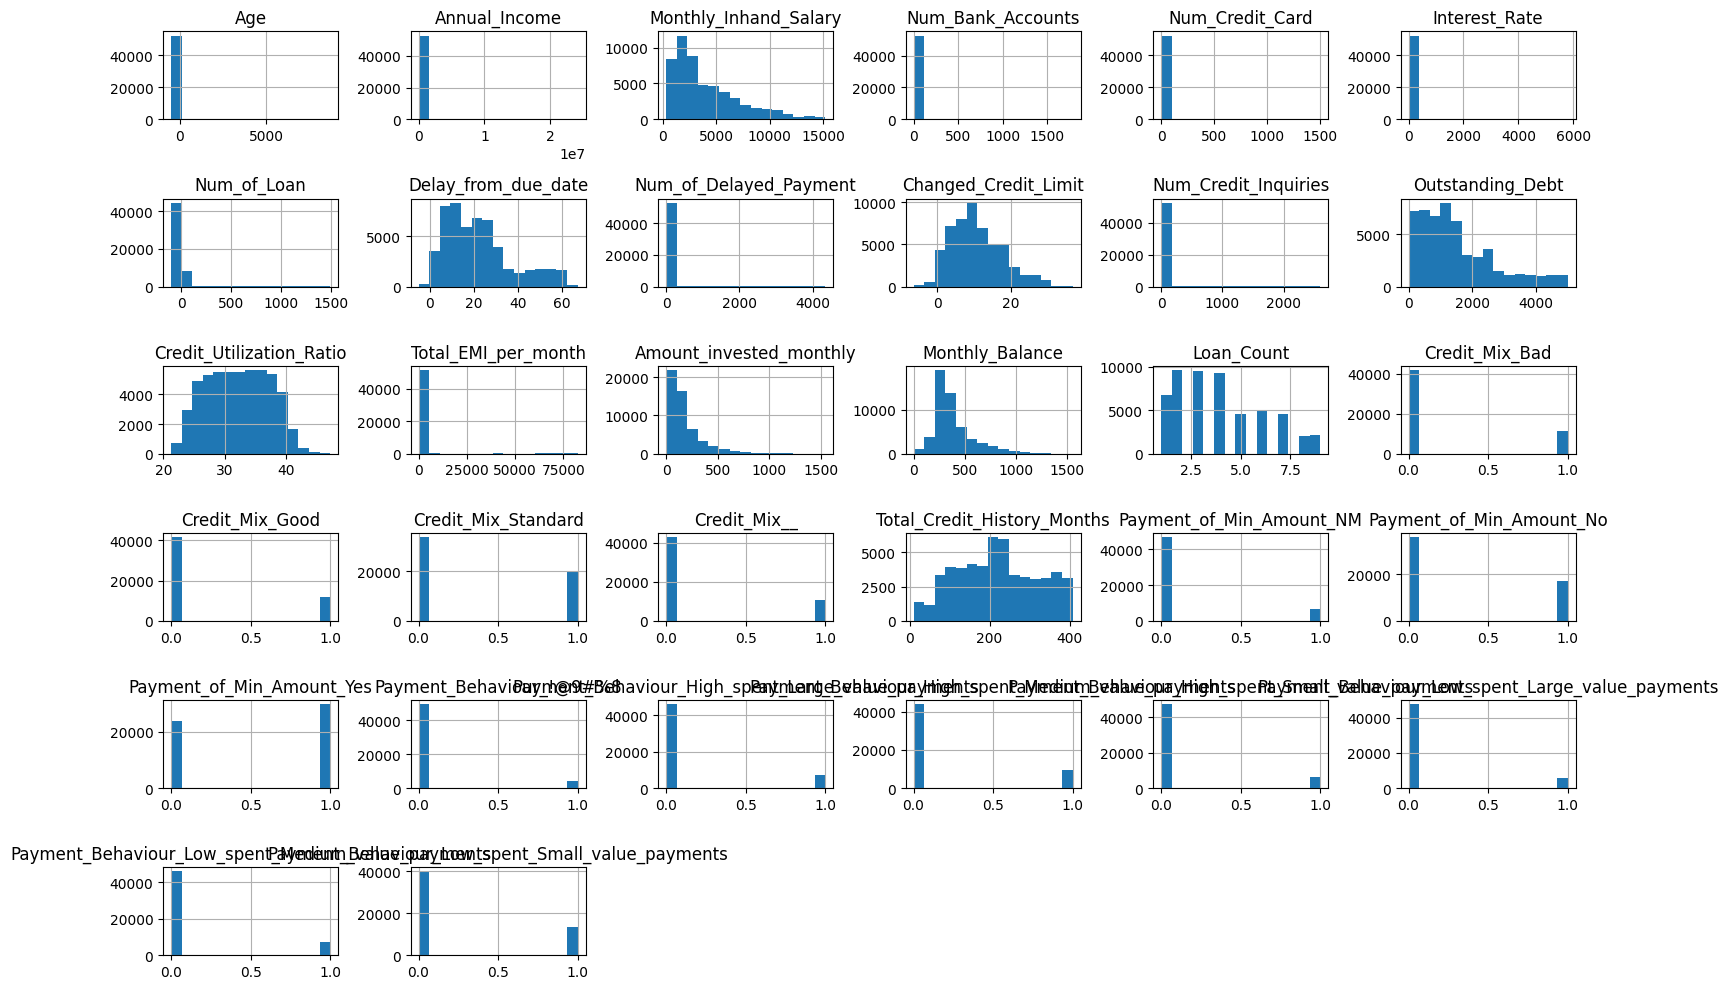

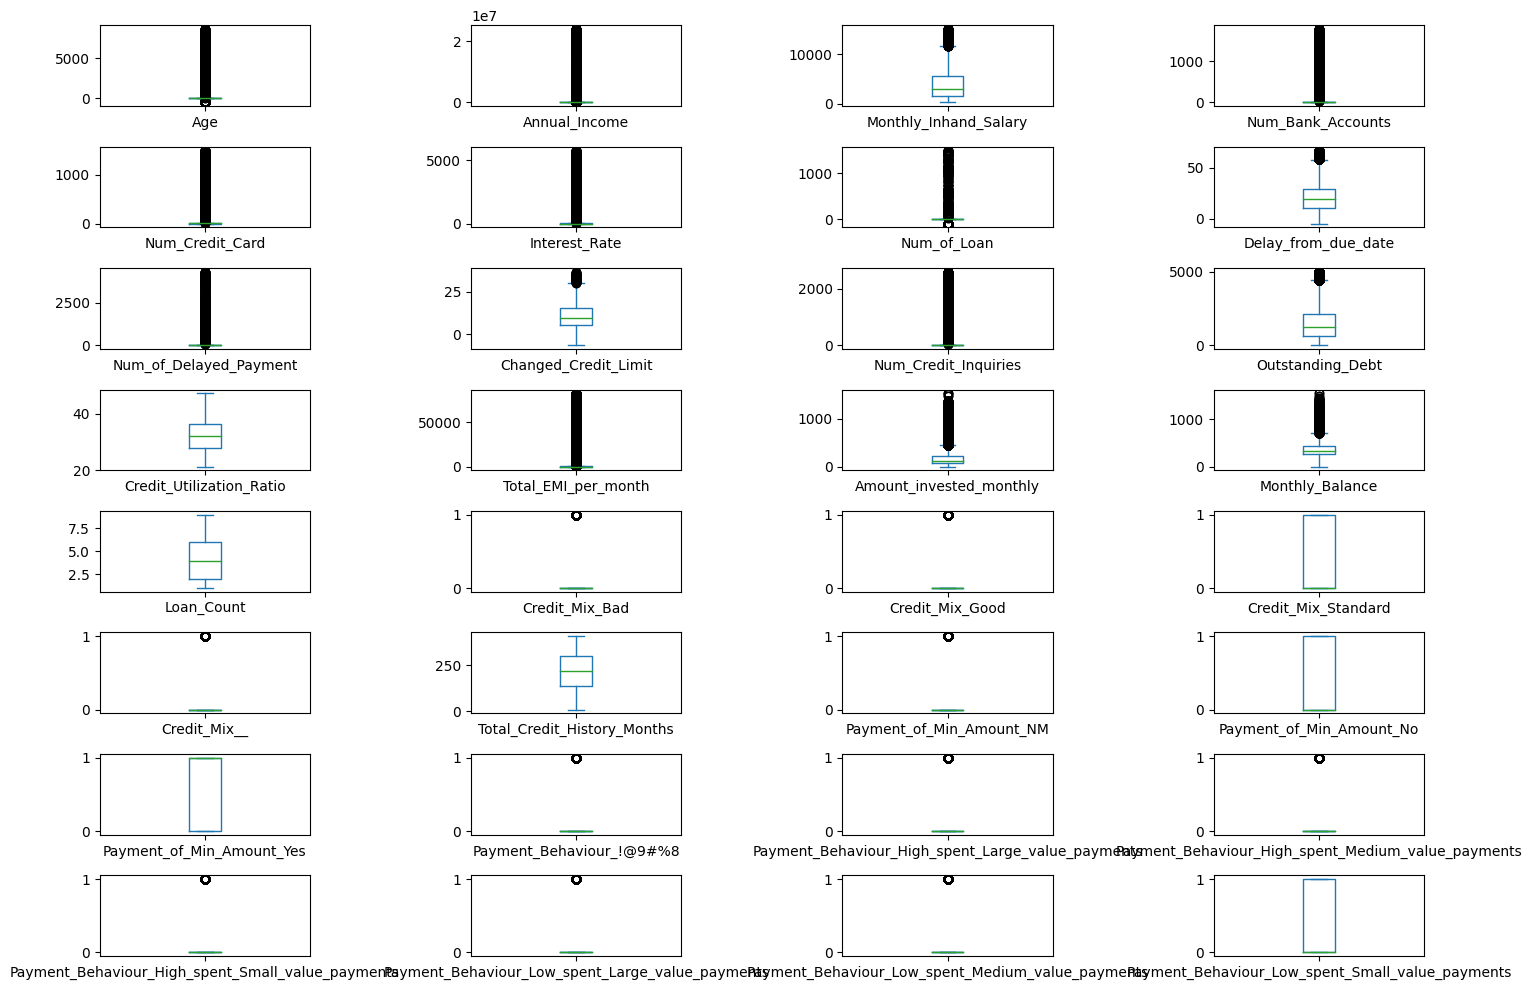

In [ ]:
# Histograms for all numeric data
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()

# Box plots for all numeric data
# Adjust the layout depending on the number of columns
num_cols = len(df.columns)
num_rows = num_cols // 4 + (num_cols % 4 > 0)  # Determines the number of rows needed in the layout

df.plot(kind='box', subplots=True, layout=(num_rows, 4), sharex=False, sharey=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

Finding Best and Related Columns for the Credit Score Report Prediction

1. Correlation Matrix

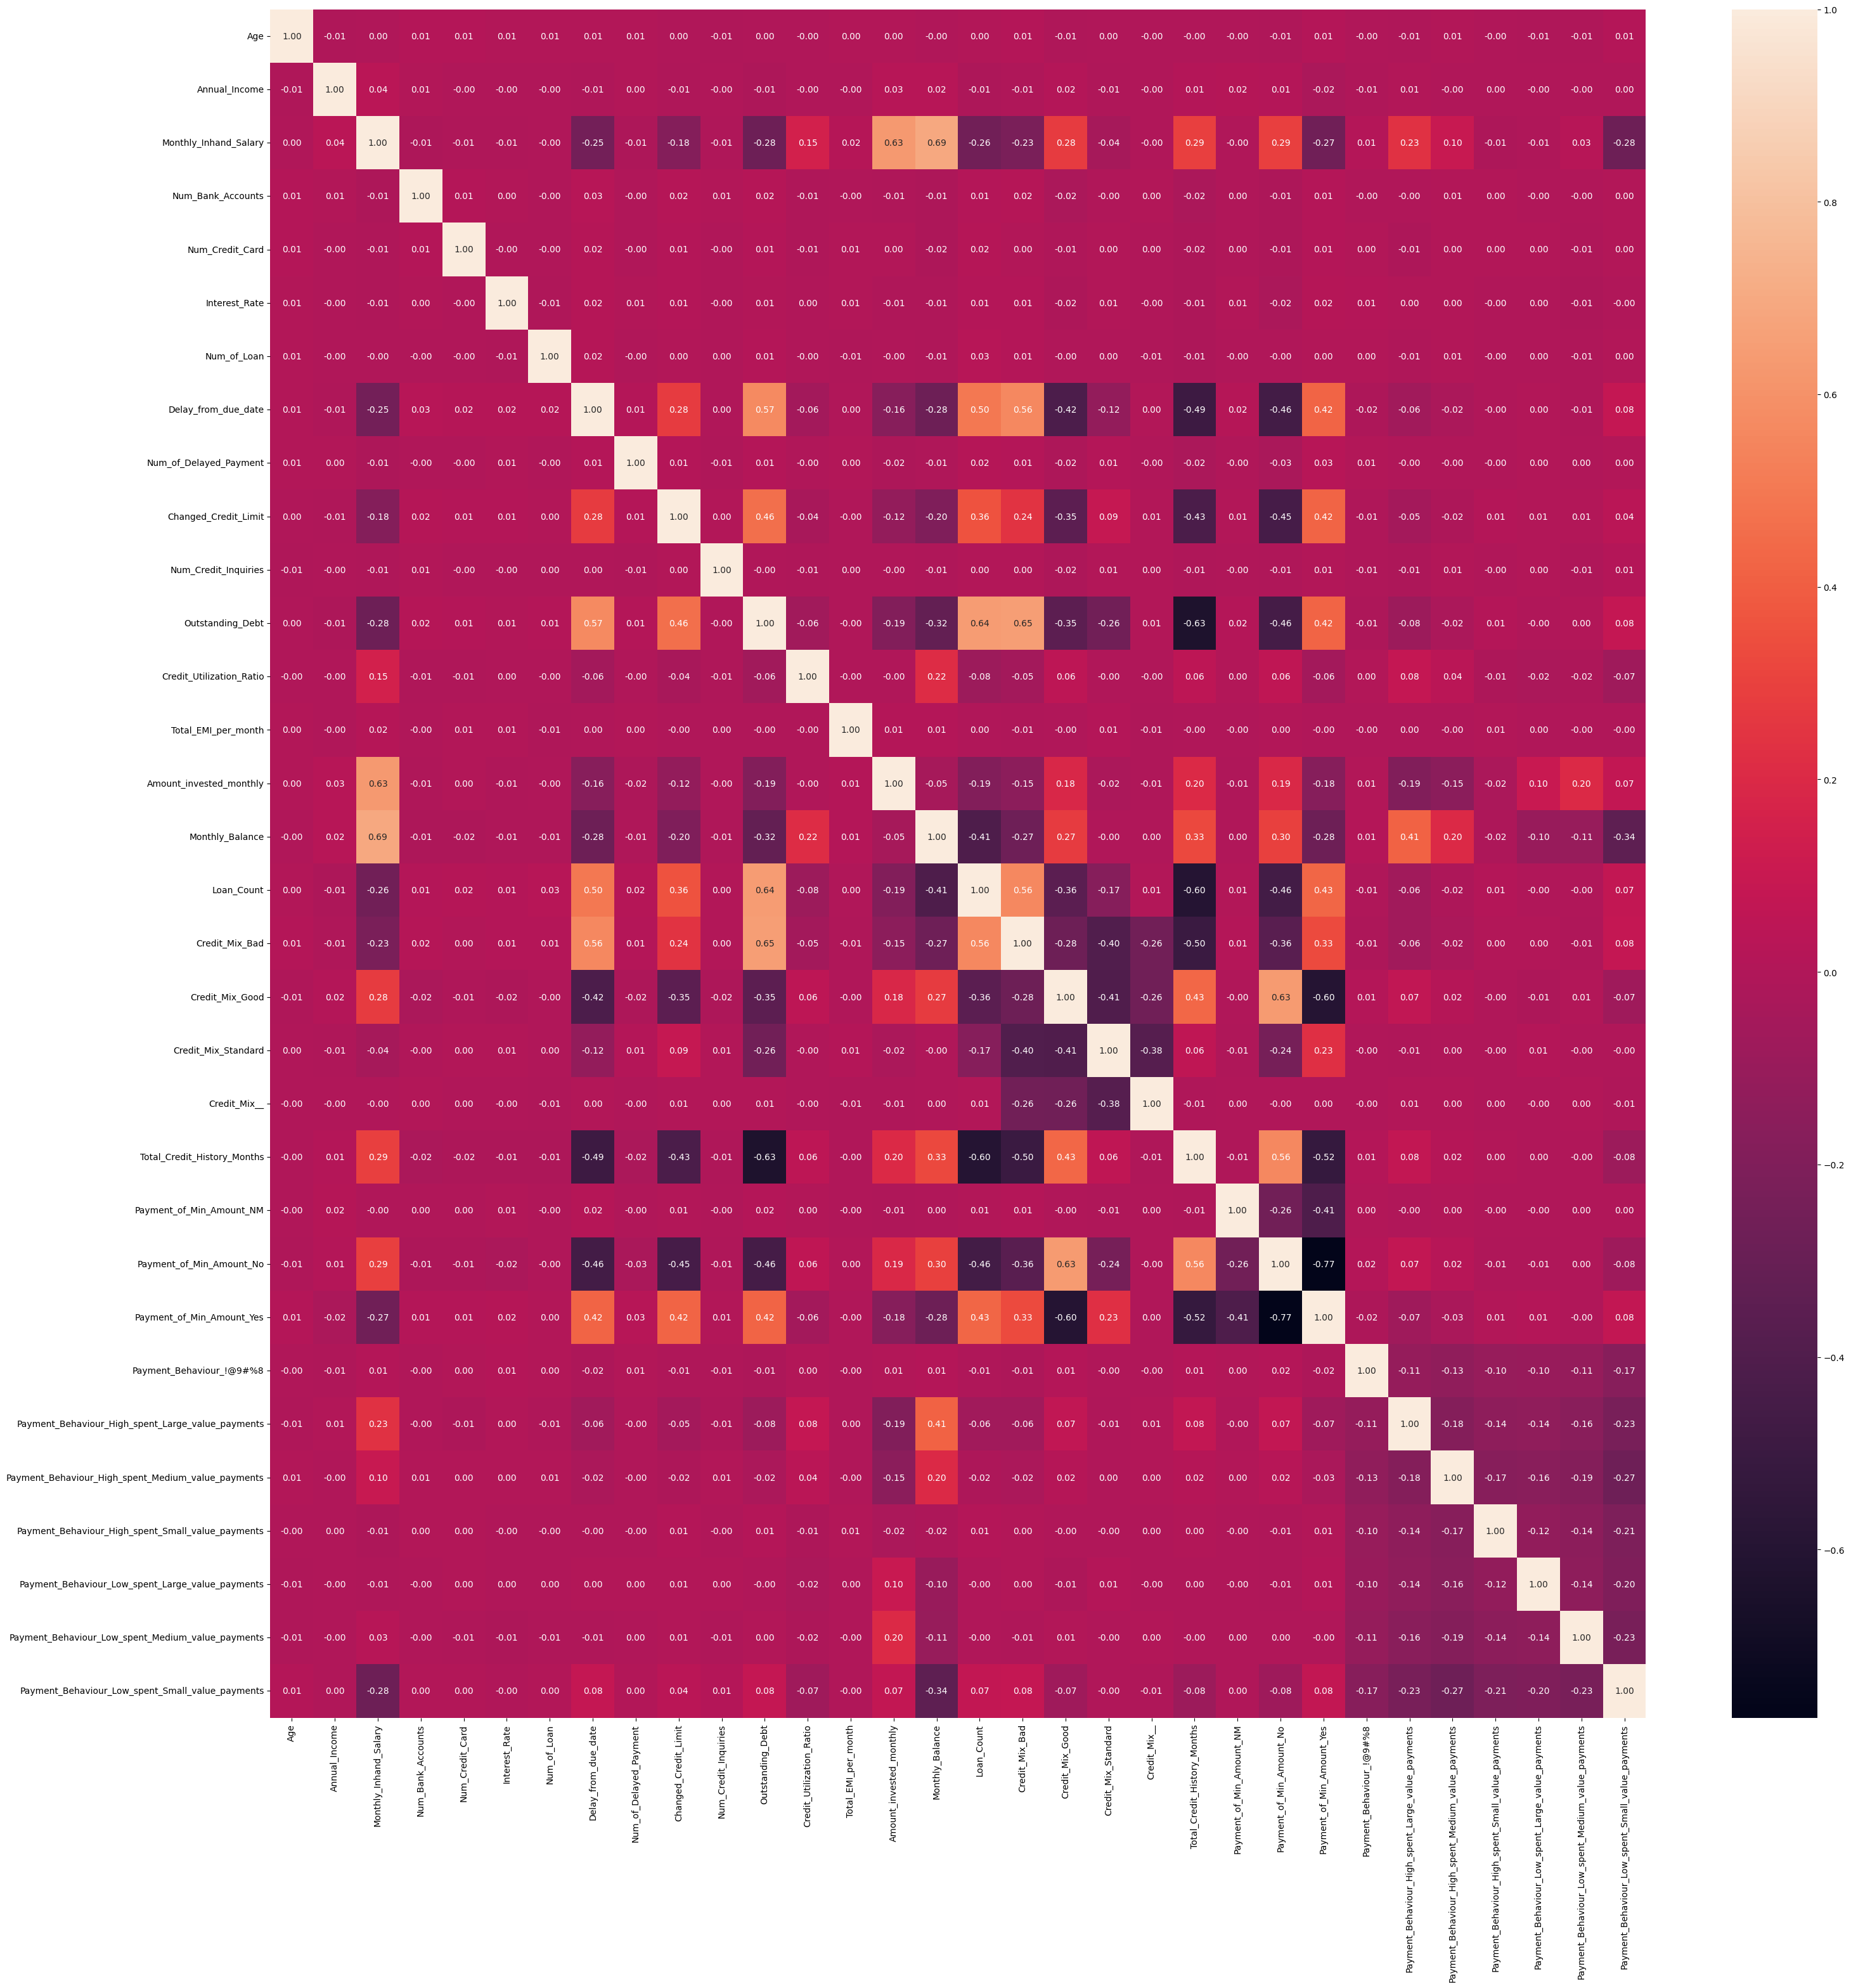

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(35, 35))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


2. Pair Plot

In [ ]:
# List of features to plot against 'Credit_Score'
features = df.columns.drop('Credit_Score')

# Set the number of plots per row
plots_per_row = 3

# Calculate the total number of rows needed
num_rows = len(features) // plots_per_row + (len(features) % plots_per_row > 0)

# Set the size of each individual plot
plot_width = 5
plot_height = 4

# Create a figure with subplots
plt.figure(figsize=(plot_width * plots_per_row, plot_height * num_rows))

# Loop through the features and create a scatter plot for each
for i, feature in enumerate(features, 1):
    plt.subplot(num_rows, plots_per_row, i)
    sns.scatterplot(data=df, x=feature, y='Credit_Score')
    plt.title(feature)

plt.tight_layout()
plt.show()


KeyError: ignored

3. Using RandomForest Classifier to find the Best Columns

In [ ]:
# Assuming 'Credit_Score' is your target variable
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

model = RandomForestClassifier()
model.fit(X, y)

# Feature importance
importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
importance = importance.sort_values('importance', ascending=False)
print(importance)

KeyError: ignored

Evaluating Scores:

Based on the importance scores above, here's a potential approach:

  1. High Importance: Definitely keep Month, Outstanding_Debt, Interest_Rate, Num_Credit_Inquiries with relatively high scores.

  2. Medium Importance: Evaluate features like Credit_Mix, Monthly_Inhand_Salary, Total_EMI_per_month, etc. might not have scores as high but are still important.
  
  3. Low Importance: Features like Payment_Behaviour and Payment_of_Min_Amount have low scores. Consider dropping them, but evaluate the impact on model performance.

  I am dropping columns with scores lower than 0.11

In [ ]:
# Set a threshold for feature importance
threshold = 0.011  # This is an example value; adjust it based on your analysis

# Filter out features below the threshold
important_features = importance[importance['importance'] >= threshold]['feature']

# Select only important features in your dataset
X_filtered = X[important_features]

# Get the indices of the rows in the filtered dataset
filtered_indices = X_filtered.index

# Apply the same filtering to 'y'
y_filtered = y.loc[filtered_indices]

# Now X_filtered and y_filtered contain only the rows and columns with importance above the threshold
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

NameError: ignored

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: ignored

In [ ]:
X.describe()

Gradient Boost Algorithm

In [ ]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Train the model
gbr.fit(X_filtered, y_filtered)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_gbr)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_gbr)
print("Mean Squared Error (MSE):", mse)

# If you also want to calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_gbr, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Gradient Boost Visualization for Feature Importance

In [ ]:
# Get feature importances
feature_importances = gbr.feature_importances_

# Convert to a DataFrame
# Use column names from X_filtered as it was the source DataFrame for X_train
features_df = pd.DataFrame({'Features': X_filtered.columns, 'Importance': feature_importances})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=features_df)
plt.title('Feature Importances')
plt.show()

K-Nearest Neighbor

In [ ]:
# Creating and Training the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVM Classifier

In [ ]:
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svm_classifier.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))